In [1]:
import re
import numpy as np
import pandas as pd
import os
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

from matplotlib.patches import Rectangle

import seaborn as sns

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
mpl.rc('axes',labelsize=14)
mpl.rc('xtick',labelsize=12)
mpl.rc('ytick',labelsize=12)
mpl.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.tab10.colors)
#https://matplotlib.org/stable/users/explain/colors/colormaps.html

#plt.style.use('seaborn-v0_8-muted')
# change line thickness for all
plt.rcParams['lines.linewidth'] = 1

In [2]:
PROJECT_ROOT_DIR='.' # Current directory
CHAPTER_ID='Graphs'
IMAGE_PATH=os.path.join(PROJECT_ROOT_DIR,'images',CHAPTER_ID)
os.makedirs(IMAGE_PATH,exist_ok=True)
print(IMAGE_PATH)


def save_fig(fig_id,tight_layout=True,fig_extension='png',resolution=300):
    path=os.path.join(IMAGE_PATH,fig_id+'.'+fig_extension)
    print('Saving figure:', fig_id)
    for ax in plt.gcf().get_axes():
        ax.set_title('')
        # legend = ax.get_legend()
        # if legend:
        #     legend.remove()
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path,dpi=resolution,format=fig_extension)

./images/Graphs


In [3]:
# Load the data from RDF.dat file
file_path_DPE_1M = 'RDF_1_1000000_1000000_bin3000_DPE_1M.rdf'  # Make sure to use the correct path to your file
data_DPE_1M = pd.read_csv(file_path_DPE_1M, sep=' ', names=['row_bins', 'c_RDF[1]_r', 'c_RDF[2]_Li_O(solvent)_g(r)', 'c_RDF[3]_coord(r)', 'c_RDF[4]_Li_O(FSI)_g(r)', 'c_RDF[5]_coord(r)', 'c_RDF[6]_Li_Li_g(r)', 'c_RDF[7]_coord(r)', 'c_RDF[8]_Li_N_g(r)', 'c_RDF[9]_coord(r)'])

file_path_DPE_1p8M = 'RDF_1_1000000_1000000_bin3000_DPE_1p8M.rdf'  # Make sure to use the correct path to your file
data_DPE_1p8M = pd.read_csv(file_path_DPE_1p8M, sep=' ', names=['row_bins', 'c_RDF[1]_r', 'c_RDF[2]_Li_O(solvent)_g(r)', 'c_RDF[3]_coord(r)', 'c_RDF[4]_Li_O(FSI)_g(r)', 'c_RDF[5]_coord(r)', 'c_RDF[6]_Li_Li_g(r)', 'c_RDF[7]_coord(r)', 'c_RDF[8]_Li_N_g(r)', 'c_RDF[9]_coord(r)'])

file_path_DPE_4M = 'RDF_1_1000000_1000000_bin3000_DPE_4M.rdf'  # Make sure to use the correct path to your file
data_DPE_4M = pd.read_csv(file_path_DPE_4M, sep=' ', names=['row_bins', 'c_RDF[1]_r', 'c_RDF[2]_Li_O(solvent)_g(r)', 'c_RDF[3]_coord(r)', 'c_RDF[4]_Li_O(FSI)_g(r)', 'c_RDF[5]_coord(r)', 'c_RDF[6]_Li_Li_g(r)', 'c_RDF[7]_coord(r)', 'c_RDF[8]_Li_N_g(r)', 'c_RDF[9]_coord(r)'])

In [4]:
# Load the data from RDF.dat file
file_path_FEME_1M = 'RDF_1_1000000_1000000_bin3000_FEME_1M.rdf'  # Make sure to use the correct path to your file
data_FEME_1M = pd.read_csv(file_path_FEME_1M, sep=' ', names=['row_bins', 'c_RDF[1]_r', 'c_RDF[2]_Li_O(solvent)_g(r)', 'c_RDF[3]_coord(r)', 'c_RDF[4]_Li_O(FSI)_g(r)', 'c_RDF[5]_coord(r)', 'c_RDF[6]_Li_Li_g(r)', 'c_RDF[7]_coord(r)', 'c_RDF[8]_Li_F2(FEME)_g(r)', 'c_RDF[9]_coord(r)', 'c_RDF[10]_Li_F1(FEME)_g(r)', 'c_RDF[11]_coord(r)', 'c_RDF[12]_Li_N_g(r)', 'c_RDF[13]_coord(r)'])

# Load the data from RDF.dat file
file_path_FEME_1p8M = 'RDF_1_1000000_1000000_bin3000_FEME_1p8M.rdf'  # Make sure to use the correct path to your file
data_FEME_1p8M = pd.read_csv(file_path_FEME_1p8M, sep=' ', names=['row_bins', 'c_RDF[1]_r', 'c_RDF[2]_Li_O(solvent)_g(r)', 'c_RDF[3]_coord(r)', 'c_RDF[4]_Li_O(FSI)_g(r)', 'c_RDF[5]_coord(r)', 'c_RDF[6]_Li_Li_g(r)', 'c_RDF[7]_coord(r)', 'c_RDF[8]_Li_F2(FEME)_g(r)', 'c_RDF[9]_coord(r)', 'c_RDF[10]_Li_F1(FEME)_g(r)', 'c_RDF[11]_coord(r)', 'c_RDF[12]_Li_N_g(r)', 'c_RDF[13]_coord(r)'])

# Load the data from RDF.dat file
file_path_FEME_4M = 'RDF_1_1000000_1000000_bin3000_FEME_4M.rdf'  # Make sure to use the correct path to your file
data_FEME_4M = pd.read_csv(file_path_FEME_4M, sep=' ', names=['row_bins', 'c_RDF[1]_r', 'c_RDF[2]_Li_O(solvent)_g(r)', 'c_RDF[3]_coord(r)', 'c_RDF[4]_Li_O(FSI)_g(r)', 'c_RDF[5]_coord(r)', 'c_RDF[6]_Li_Li_g(r)', 'c_RDF[7]_coord(r)', 'c_RDF[8]_Li_F2(FEME)_g(r)', 'c_RDF[9]_coord(r)', 'c_RDF[10]_Li_F1(FEME)_g(r)', 'c_RDF[11]_coord(r)', 'c_RDF[12]_Li_N_g(r)', 'c_RDF[13]_coord(r)'])


In [5]:
# Load the data from RDF.dat file
file_path_EC1_DEC1_1M = 'RDF_1_1000000_1000000_bin3000_EC1_DEC1_1M.rdf'  # Make sure to use the correct path to your file
data_EC1_DEC1_1M = pd.read_csv(file_path_EC1_DEC1_1M, sep=' ', names=['row_bins', 'c_RDF[1]_r', 'c_RDF[2]_Li_O(solvent_EC_O3_coordinating_oxygen)_g(r)', 'c_RDF[3]_coord(r)', 'c_RDF[4]_Li_O(solvent_EC_O2)_g(r)', 'c_RDF[5]_coord(r)','c_RDF[6]_Li_O(solvent_EC_O1)_g(r)', 'c_RDF[7]_coord(r)','c_RDF[8]_Li_O(solvent_DEC_O3_coordinating_oxygen)_g(r)', 'c_RDF[9]_coord(r)','c_RDF[10]_Li_O(solvent_DEC_O2)_g(r)', 'c_RDF[11]_coord(r)', 'c_RDF[12]_Li_O(solvent_DEC_O1)_g(r)', 'c_RDF[13]_coord(r)', 'c_RDF[14]_Li_FP_g(r)', 'c_RDF[15]_coord(r)','c_RDF[16]_Li_Li_g(r)', 'c_RDF[17]_coord(r)','c_RDF[18]_Li_P_g(r)', 'c_RDF[19]_coord(r)', 'c_RDF[20]_Li_C(solvent_EC_C3_central_carbon)_g(r)', 'c_RDF[21]_coord(r)','c_RDF[22]_Li_C(solvent_EC_C2)_g(r)', 'c_RDF[23]_coord(r)','c_RDF[24]_Li_C(solvent_EC_C1)_g(r)', 'c_RDF[25]_coord(r)', 'c_RDF[26]_Li_C(solvent_DEC_C3_central_carbon)_g(r)', 'c_RDF[27]_coord(r)','c_RDF[28]_Li_C(solvent_DEC_C4)_g(r)', 'c_RDF[29]_coord(r)','c_RDF[30]_Li_C(solvent_DEC_C2)_g(r)', 'c_RDF[31]_coord(r)'])


Saving figure: RDF_Li_O(solvent)_DPE_FEME_ECDEC


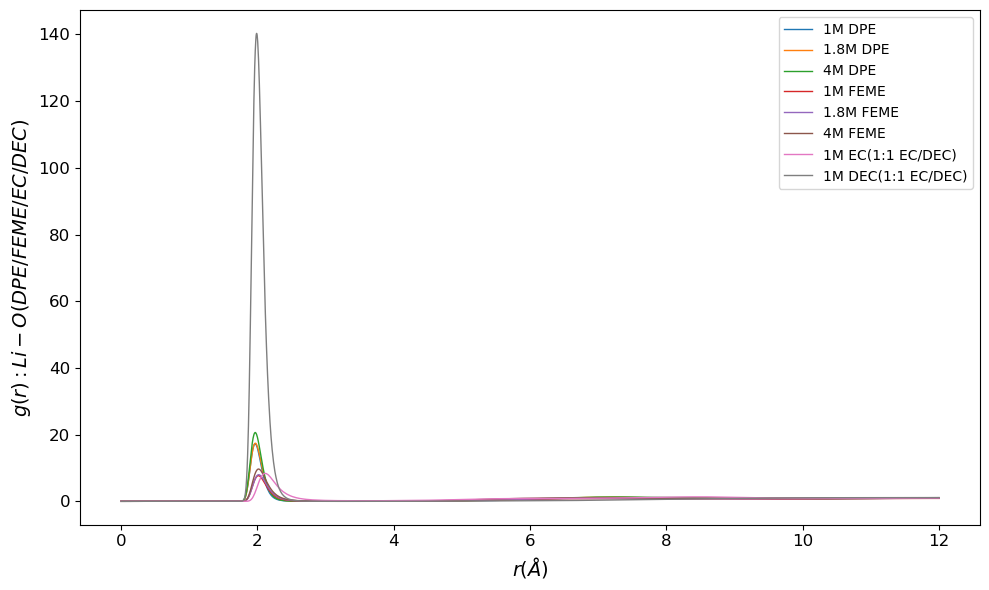

Saving figure: RDF_Li_O(FSI)_DPE_FEME_ECDEC


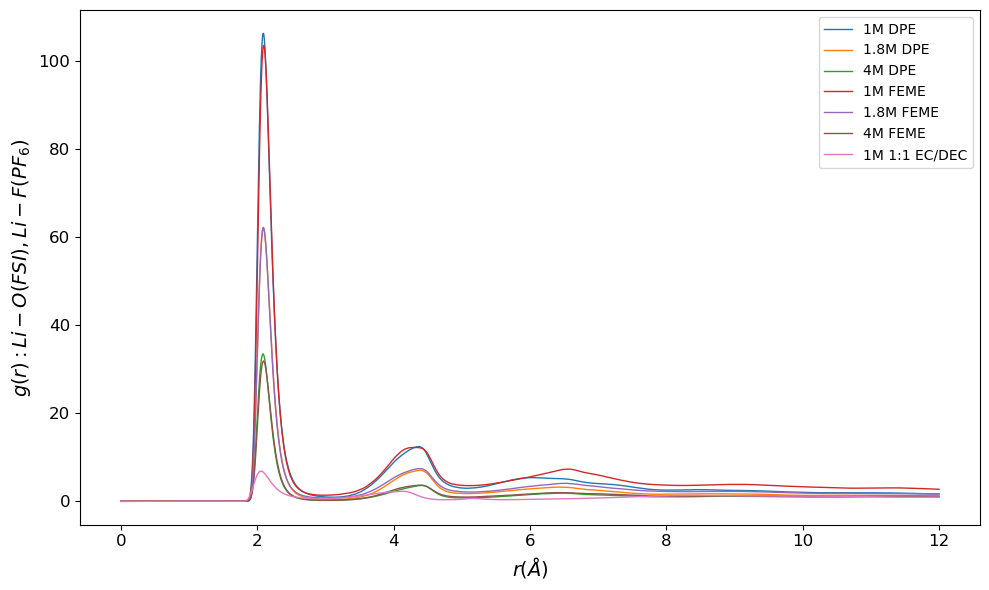

Saving figure: RDF_Li_Li_DPE_FEME_ECDEC


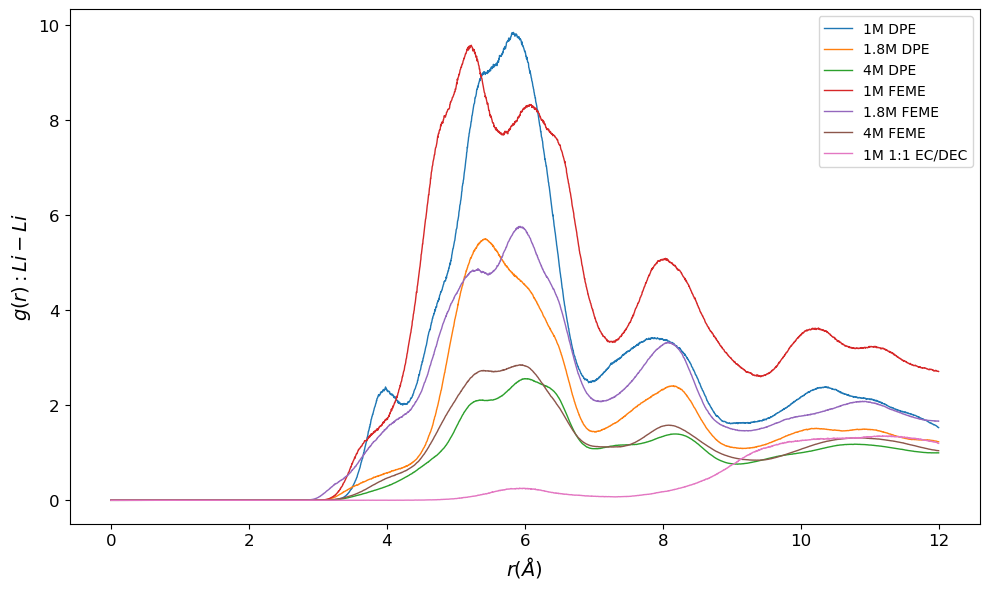

Saving figure: RDF_Li_N_DPE_FEME_ECDEC


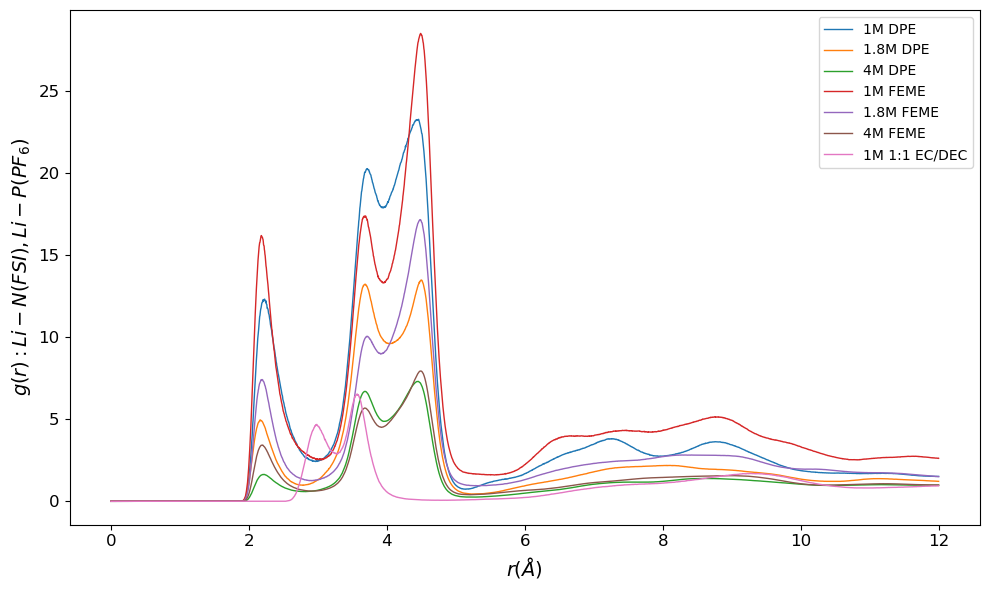

In [6]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(data_DPE_1M['c_RDF[1]_r'], data_DPE_1M['c_RDF[2]_Li_O(solvent)_g(r)'], label='1M DPE')
plt.plot(data_DPE_1p8M['c_RDF[1]_r'], data_DPE_1p8M['c_RDF[2]_Li_O(solvent)_g(r)'], label='1.8M DPE')
plt.plot(data_DPE_4M['c_RDF[1]_r'], data_DPE_4M['c_RDF[2]_Li_O(solvent)_g(r)'], label='4M DPE')
plt.plot(data_FEME_1M['c_RDF[1]_r'], data_FEME_1M['c_RDF[2]_Li_O(solvent)_g(r)'], label='1M FEME')
plt.plot(data_FEME_1p8M['c_RDF[1]_r'], data_FEME_1p8M['c_RDF[2]_Li_O(solvent)_g(r)'], label='1.8M FEME')
plt.plot(data_FEME_4M['c_RDF[1]_r'], data_FEME_4M['c_RDF[2]_Li_O(solvent)_g(r)'], label='4M FEME')
plt.plot(data_EC1_DEC1_1M['c_RDF[1]_r'], data_EC1_DEC1_1M['c_RDF[2]_Li_O(solvent_EC_O3_coordinating_oxygen)_g(r)'], label='1M EC(1:1 EC/DEC)')
plt.plot(data_EC1_DEC1_1M['c_RDF[1]_r'], data_EC1_DEC1_1M['c_RDF[8]_Li_O(solvent_DEC_O3_coordinating_oxygen)_g(r)'], label='1M DEC(1:1 EC/DEC)')

# Adding labels and title
plt.xlabel(r'$r (\AA)$')
plt.ylabel(r'$g(r): Li-O(DPE/FEME/EC/DEC)$')
plt.title('Plot of r vs g(r) for Li-O(solvent)')
plt.legend()
save_fig('RDF_Li_O(solvent)_DPE_FEME_ECDEC')
# Show the plot
plt.show()



plt.figure(figsize=(10, 6))
plt.plot(data_DPE_1M['c_RDF[1]_r'], data_DPE_1M['c_RDF[4]_Li_O(FSI)_g(r)'], label='1M DPE')
plt.plot(data_DPE_1p8M['c_RDF[1]_r'], data_DPE_1p8M['c_RDF[4]_Li_O(FSI)_g(r)'], label='1.8M DPE')
plt.plot(data_DPE_4M['c_RDF[1]_r'], data_DPE_4M['c_RDF[4]_Li_O(FSI)_g(r)'], label='4M DPE')
plt.plot(data_FEME_1M['c_RDF[1]_r'], data_FEME_1M['c_RDF[4]_Li_O(FSI)_g(r)'], label='1M FEME')
plt.plot(data_FEME_1p8M['c_RDF[1]_r'], data_FEME_1p8M['c_RDF[4]_Li_O(FSI)_g(r)'], label='1.8M FEME')
plt.plot(data_FEME_4M['c_RDF[1]_r'], data_FEME_4M['c_RDF[4]_Li_O(FSI)_g(r)'], label='4M FEME')
plt.plot(data_EC1_DEC1_1M['c_RDF[1]_r'], data_EC1_DEC1_1M['c_RDF[14]_Li_FP_g(r)'], label='1M 1:1 EC/DEC')


# Adding labels and title
plt.xlabel(r'$r (\AA)$')
plt.ylabel(r'$g(r): Li-O(FSI) , Li-F(PF_6)$')
plt.title('Plot of r vs g(r) for Li-O(FSI)')
plt.legend()
save_fig('RDF_Li_O(FSI)_DPE_FEME_ECDEC')
# Show the plot
plt.show()


plt.figure(figsize=(10, 6))
plt.plot(data_DPE_1M['c_RDF[1]_r'], data_DPE_1M['c_RDF[6]_Li_Li_g(r)'], label='1M DPE')
plt.plot(data_DPE_1p8M['c_RDF[1]_r'], data_DPE_1p8M['c_RDF[6]_Li_Li_g(r)'], label='1.8M DPE')
plt.plot(data_DPE_4M['c_RDF[1]_r'], data_DPE_4M['c_RDF[6]_Li_Li_g(r)'], label='4M DPE')
plt.plot(data_FEME_1M['c_RDF[1]_r'], data_FEME_1M['c_RDF[6]_Li_Li_g(r)'], label='1M FEME')
plt.plot(data_FEME_1p8M['c_RDF[1]_r'], data_FEME_1p8M['c_RDF[6]_Li_Li_g(r)'], label='1.8M FEME')
plt.plot(data_FEME_4M['c_RDF[1]_r'], data_FEME_4M['c_RDF[6]_Li_Li_g(r)'], label='4M FEME')
plt.plot(data_EC1_DEC1_1M['c_RDF[1]_r'], data_EC1_DEC1_1M['c_RDF[16]_Li_Li_g(r)'], label='1M 1:1 EC/DEC')


# Adding labels and title
plt.xlabel(r'$r (\AA)$')
plt.ylabel(r'$g(r): Li-Li$')
plt.title('Plot of r vs g(r) for Li-Li')
plt.legend()
save_fig('RDF_Li_Li_DPE_FEME_ECDEC')
# Show the plot
plt.show()


plt.figure(figsize=(10, 6))
plt.plot(data_DPE_1M['c_RDF[1]_r'], data_DPE_1M['c_RDF[8]_Li_N_g(r)'], label='1M DPE')
plt.plot(data_DPE_1p8M['c_RDF[1]_r'], data_DPE_1p8M['c_RDF[8]_Li_N_g(r)'], label='1.8M DPE')
plt.plot(data_DPE_4M['c_RDF[1]_r'], data_DPE_4M['c_RDF[8]_Li_N_g(r)'], label='4M DPE')
plt.plot(data_FEME_1M['c_RDF[1]_r'], data_FEME_1M['c_RDF[12]_Li_N_g(r)'], label='1M FEME')
plt.plot(data_FEME_1p8M['c_RDF[1]_r'], data_FEME_1p8M['c_RDF[12]_Li_N_g(r)'], label='1.8M FEME')
plt.plot(data_FEME_4M['c_RDF[1]_r'], data_FEME_4M['c_RDF[12]_Li_N_g(r)'], label='4M FEME')
plt.plot(data_EC1_DEC1_1M['c_RDF[1]_r'], data_EC1_DEC1_1M['c_RDF[18]_Li_P_g(r)'], label='1M 1:1 EC/DEC')

# Adding labels and title
plt.xlabel(r'$r (\AA)$')
plt.ylabel(r'$g(r): Li-N(FSI) , Li-P(PF_6)$')
plt.title('Plot of r vs g(r) for Li-N')
plt.legend()
save_fig('RDF_Li_N_DPE_FEME_ECDEC')
# Show the plot
plt.show()





Saving figure: RDF_Li_O(solvent)_inset_DPE_FEME_ECDEC


/var/folders/gh/j7mcjbpx16dc0prr6v6_62lc0000gn/T/ipykernel_44390/641606264.py:17: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


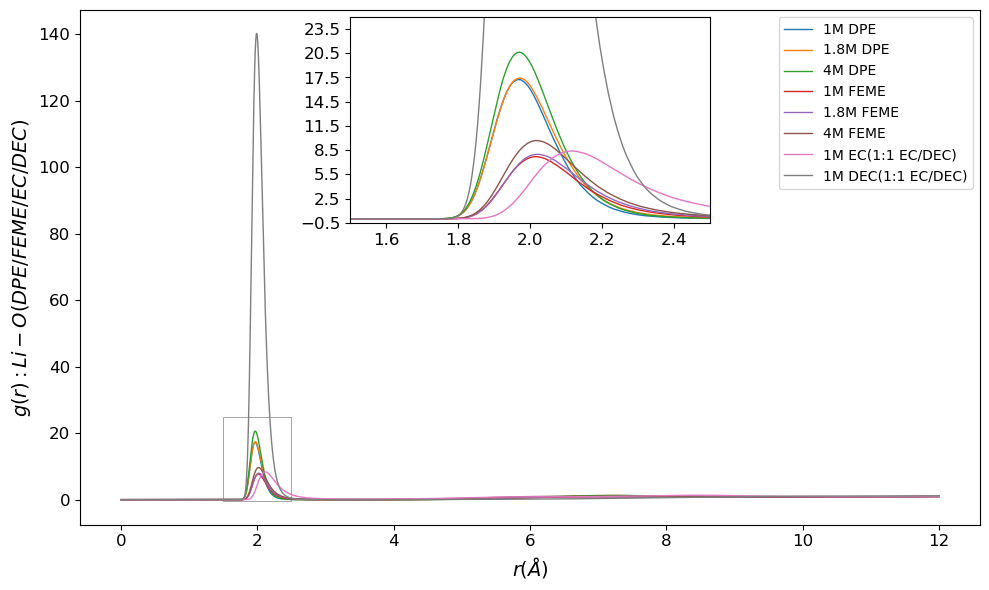

In [7]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(data_DPE_1M['c_RDF[1]_r'], data_DPE_1M['c_RDF[2]_Li_O(solvent)_g(r)'], label='1M DPE')
plt.plot(data_DPE_1p8M['c_RDF[1]_r'], data_DPE_1p8M['c_RDF[2]_Li_O(solvent)_g(r)'], label='1.8M DPE')
plt.plot(data_DPE_4M['c_RDF[1]_r'], data_DPE_4M['c_RDF[2]_Li_O(solvent)_g(r)'], label='4M DPE')
plt.plot(data_FEME_1M['c_RDF[1]_r'], data_FEME_1M['c_RDF[2]_Li_O(solvent)_g(r)'], label='1M FEME')
plt.plot(data_FEME_1p8M['c_RDF[1]_r'], data_FEME_1p8M['c_RDF[2]_Li_O(solvent)_g(r)'], label='1.8M FEME')
plt.plot(data_FEME_4M['c_RDF[1]_r'], data_FEME_4M['c_RDF[2]_Li_O(solvent)_g(r)'], label='4M FEME')
plt.plot(data_EC1_DEC1_1M['c_RDF[1]_r'], data_EC1_DEC1_1M['c_RDF[2]_Li_O(solvent_EC_O3_coordinating_oxygen)_g(r)'], label='1M EC(1:1 EC/DEC)')
plt.plot(data_EC1_DEC1_1M['c_RDF[1]_r'], data_EC1_DEC1_1M['c_RDF[8]_Li_O(solvent_DEC_O3_coordinating_oxygen)_g(r)'], label='1M DEC(1:1 EC/DEC)')

# Adding labels and title
plt.xlabel(r'$r (\AA)$')
plt.ylabel(r'$g(r): Li-O(DPE/FEME/EC/DEC)$')
plt.title('Plot of r vs g(r) for Li-O(solvent)')
plt.legend()
# get the plt ax
ax = plt.gca()
inset_ax = inset_axes(ax, width="40%", height="40%", loc='upper center')
# Plot the same data on the inset, but with different limits to zoom in
inset_ax.plot(data_DPE_1M['c_RDF[1]_r'], data_DPE_1M['c_RDF[2]_Li_O(solvent)_g(r)'], label='1M DPE')
inset_ax.plot(data_DPE_1p8M['c_RDF[1]_r'], data_DPE_1p8M['c_RDF[2]_Li_O(solvent)_g(r)'], label='1.8M DPE')
inset_ax.plot(data_DPE_4M['c_RDF[1]_r'], data_DPE_4M['c_RDF[2]_Li_O(solvent)_g(r)'], label='4M DPE')
inset_ax.plot(data_FEME_1M['c_RDF[1]_r'], data_FEME_1M['c_RDF[2]_Li_O(solvent)_g(r)'], label='1M FEME')
inset_ax.plot(data_FEME_1p8M['c_RDF[1]_r'], data_FEME_1p8M['c_RDF[2]_Li_O(solvent)_g(r)'], label='1.8M FEME')
inset_ax.plot(data_FEME_4M['c_RDF[1]_r'], data_FEME_4M['c_RDF[2]_Li_O(solvent)_g(r)'], label='4M FEME')
inset_ax.plot(data_EC1_DEC1_1M['c_RDF[1]_r'], data_EC1_DEC1_1M['c_RDF[2]_Li_O(solvent_EC_O3_coordinating_oxygen)_g(r)'], label='1M EC(1:1 EC/DEC)')
inset_ax.plot(data_EC1_DEC1_1M['c_RDF[1]_r'], data_EC1_DEC1_1M['c_RDF[8]_Li_O(solvent_DEC_O3_coordinating_oxygen)_g(r)'], label='1M DEC(1:1 EC/DEC)')

inset_ax.set_xlim(1.5, 2.5)  # Adjust these limits to focus on the desired part
inset_ax.set_ylim(-.5, 25)  # Adjust these limits as well
# set inset_ax y ticks 0.5 apart
inset_ax.set_yticks(np.arange(-.5, 25, 3))
x1, x2, y1, y2 = 1.5, 2.5, -.5, 25
rect = Rectangle((x1, y1), x2-x1, y2-y1, linewidth=0.5, edgecolor='gray', facecolor='none')
ax.add_patch(rect)
save_fig('RDF_Li_O(solvent)_inset_DPE_FEME_ECDEC')
# Show the plot
plt.show()

Saving figure: CN_Li_O(solvent)_DPE_FEME_ECDEC


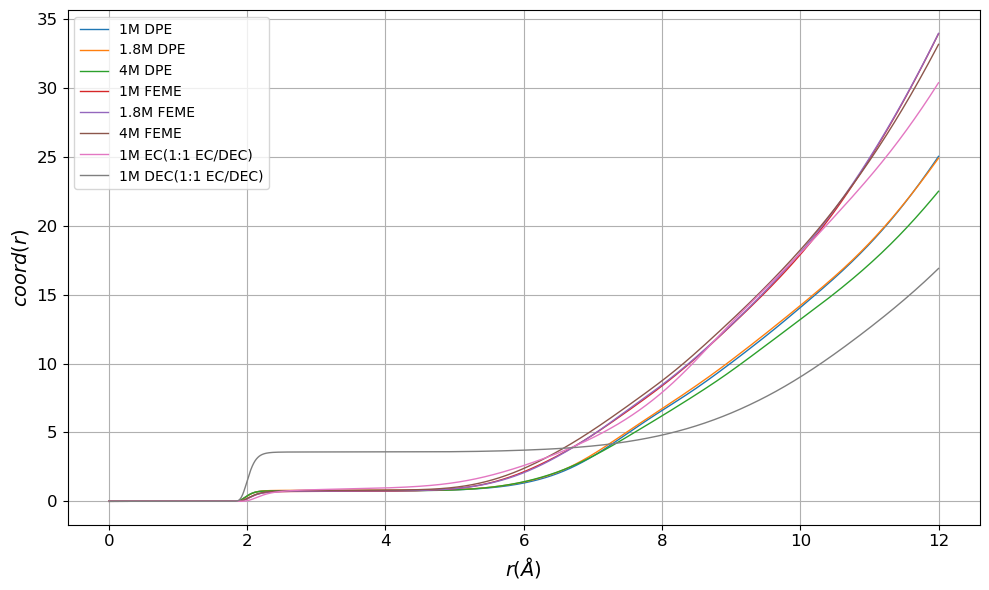

Saving figure: CN_Li_O(FSI)_DPE_FEME_ECDEC


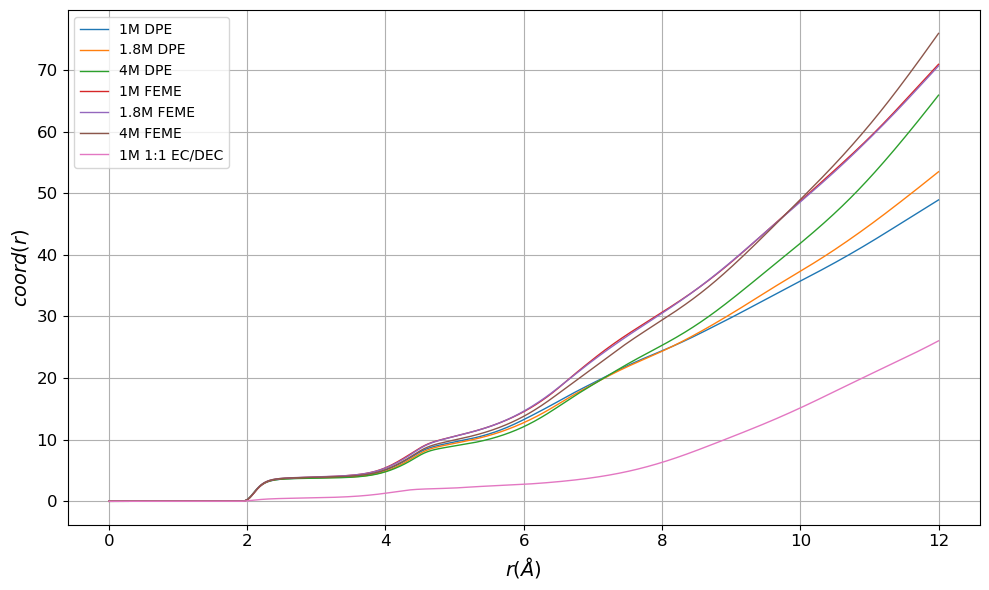

Saving figure: CN_Li_Li_DPE_FEME_ECDEC


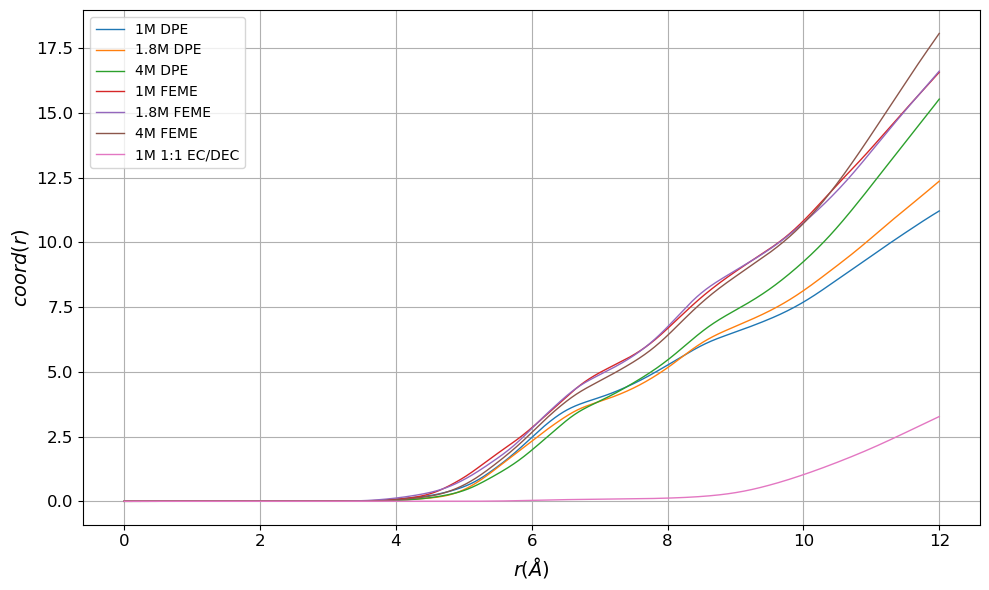

Saving figure: CN_Li_N_DPE_FEME_ECDEC


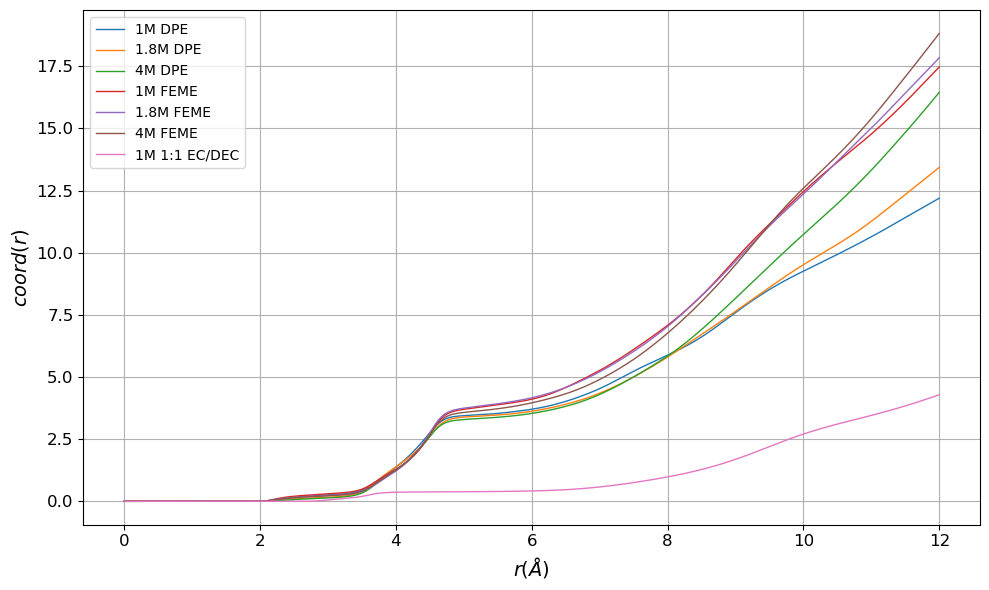

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(data_DPE_1M['c_RDF[1]_r'], data_DPE_1M['c_RDF[3]_coord(r)'], label='1M DPE')
plt.plot(data_DPE_1p8M['c_RDF[1]_r'], data_DPE_1p8M['c_RDF[3]_coord(r)'], label='1.8M DPE')
plt.plot(data_DPE_4M['c_RDF[1]_r'], data_DPE_4M['c_RDF[3]_coord(r)'], label='4M DPE')
plt.plot(data_FEME_1M['c_RDF[1]_r'], data_FEME_1M['c_RDF[3]_coord(r)'], label='1M FEME')
plt.plot(data_FEME_1p8M['c_RDF[1]_r'], data_FEME_1p8M['c_RDF[3]_coord(r)'], label='1.8M FEME')
plt.plot(data_FEME_4M['c_RDF[1]_r'], data_FEME_4M['c_RDF[3]_coord(r)'], label='4M FEME')
plt.plot(data_EC1_DEC1_1M['c_RDF[1]_r'], data_EC1_DEC1_1M['c_RDF[3]_coord(r)'], label='1M EC(1:1 EC/DEC)')
plt.plot(data_EC1_DEC1_1M['c_RDF[1]_r'], data_EC1_DEC1_1M['c_RDF[9]_coord(r)'], label='1M DEC(1:1 EC/DEC)')

# Adding labels and title
plt.xlabel(r'$r (\AA)$')
plt.ylabel(r'$coord(r)$')
plt.title('Plot of r vs coord(r) for Li-O(solvent)')
plt.legend()
plt.grid()
save_fig('CN_Li_O(solvent)_DPE_FEME_ECDEC')
# Show the plot
plt.show()


plt.figure(figsize=(10, 6))
plt.plot(data_DPE_1M['c_RDF[1]_r'], data_DPE_1M['c_RDF[5]_coord(r)'], label='1M DPE')
plt.plot(data_DPE_1p8M['c_RDF[1]_r'], data_DPE_1p8M['c_RDF[5]_coord(r)'], label='1.8M DPE')
plt.plot(data_DPE_4M['c_RDF[1]_r'], data_DPE_4M['c_RDF[5]_coord(r)'], label='4M DPE')
plt.plot(data_FEME_1M['c_RDF[1]_r'], data_FEME_1M['c_RDF[5]_coord(r)'], label='1M FEME')
plt.plot(data_FEME_1p8M['c_RDF[1]_r'], data_FEME_1p8M['c_RDF[5]_coord(r)'], label='1.8M FEME')
plt.plot(data_FEME_4M['c_RDF[1]_r'], data_FEME_4M['c_RDF[5]_coord(r)'], label='4M FEME')
plt.plot(data_EC1_DEC1_1M['c_RDF[1]_r'], data_EC1_DEC1_1M['c_RDF[15]_coord(r)'], label='1M 1:1 EC/DEC')

# Adding labels and title
plt.xlabel(r'$r (\AA)$')
plt.ylabel(r'$coord(r)$')
plt.title('Plot of r vs coord(r) for Li-O(FSI)')
plt.legend()
plt.grid()
save_fig('CN_Li_O(FSI)_DPE_FEME_ECDEC')
# Show the plot
plt.show()


plt.figure(figsize=(10, 6))
plt.plot(data_DPE_1M['c_RDF[1]_r'], data_DPE_1M['c_RDF[7]_coord(r)'], label='1M DPE')
plt.plot(data_DPE_1p8M['c_RDF[1]_r'], data_DPE_1p8M['c_RDF[7]_coord(r)'], label='1.8M DPE')
plt.plot(data_DPE_4M['c_RDF[1]_r'], data_DPE_4M['c_RDF[7]_coord(r)'], label='4M DPE')
plt.plot(data_FEME_1M['c_RDF[1]_r'], data_FEME_1M['c_RDF[7]_coord(r)'], label='1M FEME')
plt.plot(data_FEME_1p8M['c_RDF[1]_r'], data_FEME_1p8M['c_RDF[7]_coord(r)'], label='1.8M FEME')
plt.plot(data_FEME_4M['c_RDF[1]_r'], data_FEME_4M['c_RDF[7]_coord(r)'], label='4M FEME')
plt.plot(data_EC1_DEC1_1M['c_RDF[1]_r'], data_EC1_DEC1_1M['c_RDF[17]_coord(r)'], label='1M 1:1 EC/DEC')

# Adding labels and title
plt.xlabel(r'$r (\AA)$')
plt.ylabel(r'$coord(r)$')
plt.title('Plot of r vs coord(r) for Li-Li')
plt.legend()
plt.grid()
save_fig('CN_Li_Li_DPE_FEME_ECDEC')
# Show the plot
plt.show()


plt.figure(figsize=(10, 6))
plt.plot(data_DPE_1M['c_RDF[1]_r'], data_DPE_1M['c_RDF[9]_coord(r)'], label='1M DPE')
plt.plot(data_DPE_1p8M['c_RDF[1]_r'], data_DPE_1p8M['c_RDF[9]_coord(r)'], label='1.8M DPE')
plt.plot(data_DPE_4M['c_RDF[1]_r'], data_DPE_4M['c_RDF[9]_coord(r)'], label='4M DPE')
plt.plot(data_FEME_1M['c_RDF[1]_r'], data_FEME_1M['c_RDF[13]_coord(r)'], label='1M FEME')
plt.plot(data_FEME_1p8M['c_RDF[1]_r'], data_FEME_1p8M['c_RDF[13]_coord(r)'], label='1.8M FEME')
plt.plot(data_FEME_4M['c_RDF[1]_r'], data_FEME_4M['c_RDF[13]_coord(r)'], label='4M FEME')
plt.plot(data_EC1_DEC1_1M['c_RDF[1]_r'], data_EC1_DEC1_1M['c_RDF[19]_coord(r)'], label='1M 1:1 EC/DEC')

# Adding labels and title
plt.xlabel(r'$r (\AA)$')
plt.ylabel(r'$coord(r)$')
plt.title('Plot of r vs coord(r) for Li-N')
plt.legend()
plt.grid()
save_fig('CN_Li_N_DPE_FEME_ECDEC')
# Show the plot
plt.show()


Saving figure: CN_Li_O(solvent)_inset_DPE_FEME_ECDEC


/var/folders/gh/j7mcjbpx16dc0prr6v6_62lc0000gn/T/ipykernel_44390/641606264.py:17: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


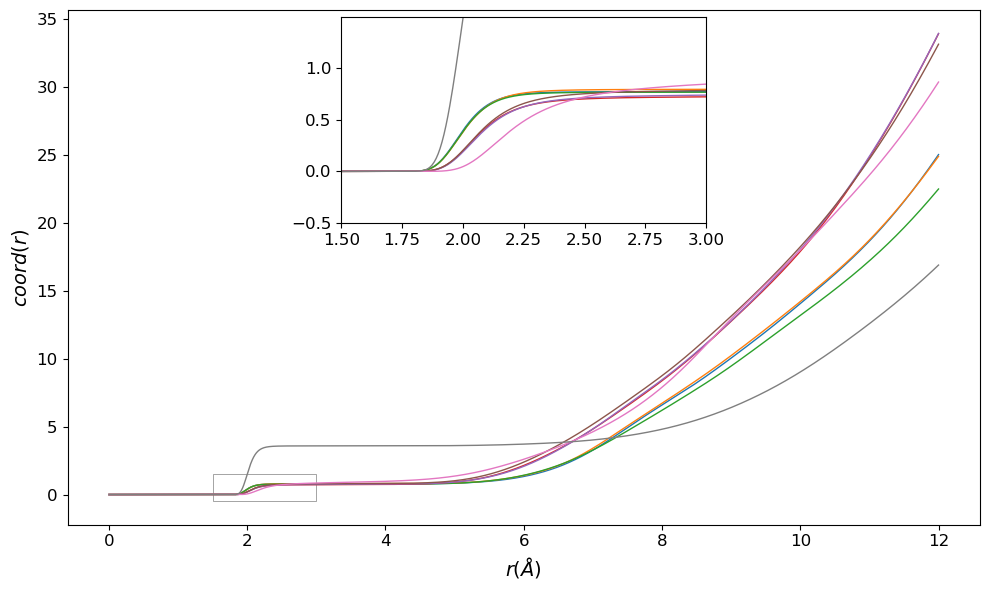

Saving figure: CN_Li_O(FSI)_inset_DPE_FEME_ECDEC


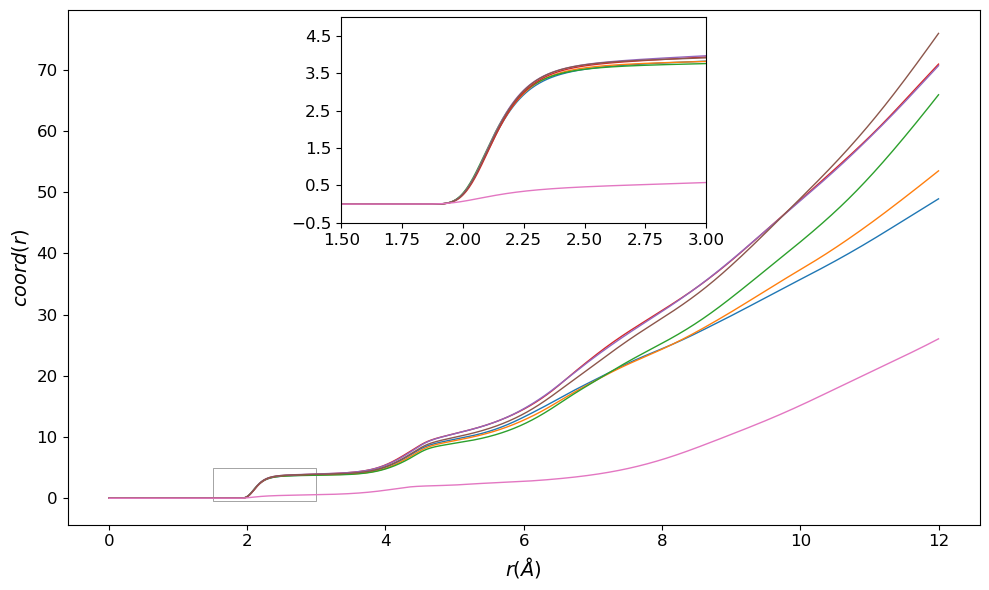

Saving figure: CN_Li_Li_inset_DPE_FEME_ECDEC


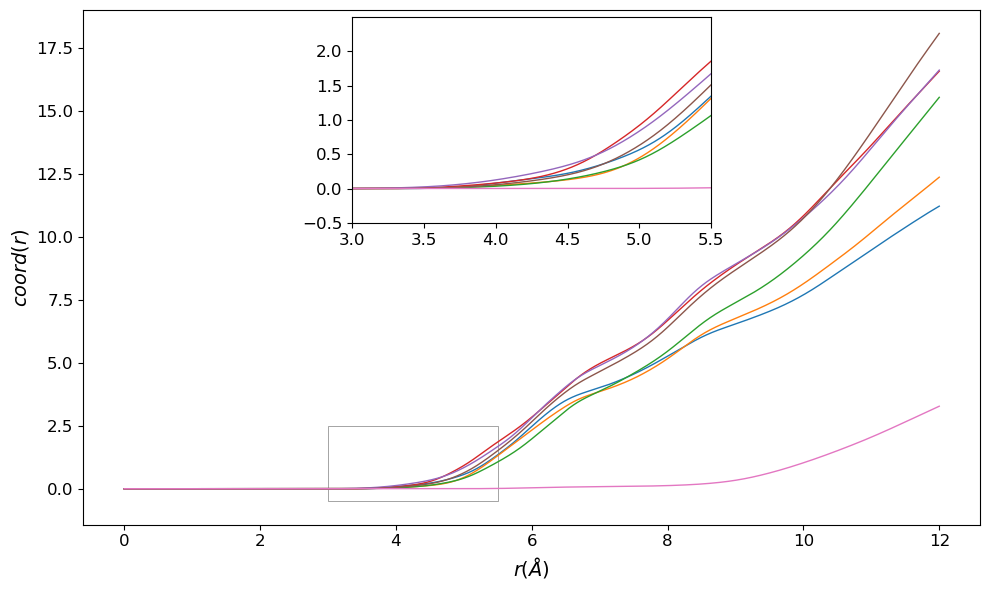

Saving figure: CN_Li_N_inset_DPE_FEME_ECDEC


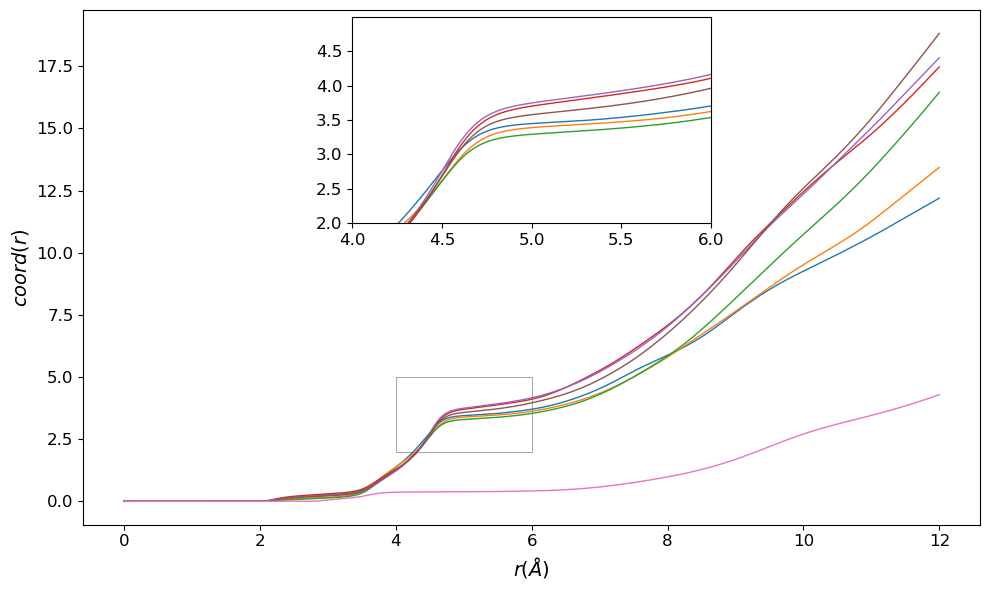

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.patches import Rectangle


# Plotting
plt.figure(figsize=(10, 6))
plt.plot(data_DPE_1M['c_RDF[1]_r'], data_DPE_1M['c_RDF[3]_coord(r)'], label='1M DPE')
plt.plot(data_DPE_1p8M['c_RDF[1]_r'], data_DPE_1p8M['c_RDF[3]_coord(r)'], label='1.8M DPE')
plt.plot(data_DPE_4M['c_RDF[1]_r'], data_DPE_4M['c_RDF[3]_coord(r)'], label='4M DPE')
plt.plot(data_FEME_1M['c_RDF[1]_r'], data_FEME_1M['c_RDF[3]_coord(r)'], label='1M FEME')
plt.plot(data_FEME_1p8M['c_RDF[1]_r'], data_FEME_1p8M['c_RDF[3]_coord(r)'], label='1.8M FEME')
plt.plot(data_FEME_4M['c_RDF[1]_r'], data_FEME_4M['c_RDF[3]_coord(r)'], label='4M FEME')
plt.plot(data_EC1_DEC1_1M['c_RDF[1]_r'], data_EC1_DEC1_1M['c_RDF[3]_coord(r)'], label='1M EC(1:1 EC/DEC)')
plt.plot(data_EC1_DEC1_1M['c_RDF[1]_r'], data_EC1_DEC1_1M['c_RDF[9]_coord(r)'], label='1M DEC(1:1 EC/DEC)')
# Adding labels and title
plt.xlabel(r'$r (\AA)$')
plt.ylabel(r'$coord(r)$')
plt.title('Plot of r vs coord(r) for Li-O(solvent)')
# plt.legend()
# plt.grid()
# get the plt ax
ax = plt.gca()
inset_ax = inset_axes(ax, width="40%", height="40%", loc='upper center')
# Plot the same data on the inset, but with different limits to zoom in
inset_ax.plot(data_DPE_1M['c_RDF[1]_r'], data_DPE_1M['c_RDF[3]_coord(r)'], label='1M DPE')
inset_ax.plot(data_DPE_1p8M['c_RDF[1]_r'], data_DPE_1p8M['c_RDF[3]_coord(r)'], label='1.8M DPE')
inset_ax.plot(data_DPE_4M['c_RDF[1]_r'], data_DPE_4M['c_RDF[3]_coord(r)'], label='4M DPE')
inset_ax.plot(data_FEME_1M['c_RDF[1]_r'], data_FEME_1M['c_RDF[3]_coord(r)'], label='1M FEME')
inset_ax.plot(data_FEME_1p8M['c_RDF[1]_r'], data_FEME_1p8M['c_RDF[3]_coord(r)'], label='1.8M FEME')
inset_ax.plot(data_FEME_4M['c_RDF[1]_r'], data_FEME_4M['c_RDF[3]_coord(r)'], label='4M FEME')
inset_ax.plot(data_EC1_DEC1_1M['c_RDF[1]_r'], data_EC1_DEC1_1M['c_RDF[3]_coord(r)'], label='1M EC(1:1 EC/DEC)')
inset_ax.plot(data_EC1_DEC1_1M['c_RDF[1]_r'], data_EC1_DEC1_1M['c_RDF[9]_coord(r)'], label='1M DEC(1:1 EC/DEC)')

inset_ax.set_xlim(1.5, 3)  # Adjust these limits to focus on the desired part
inset_ax.set_ylim(-0.5, 1.5)  # Adjust these limits as well
# set inset_ax y ticks 0.5 apart
inset_ax.set_yticks(np.arange(-0.5, 1.5, 0.5))
x1, x2, y1, y2 = 1.5, 3, -0.5, 1.5
rect = Rectangle((x1, y1), x2-x1, y2-y1, linewidth=0.5, edgecolor='gray', facecolor='none')
ax.add_patch(rect)
save_fig('CN_Li_O(solvent)_inset_DPE_FEME_ECDEC')
# save_fig('CN_Li_O(solvent)', fig_extension='svg')
# Show the plot
plt.show()


plt.figure(figsize=(10, 6))
plt.plot(data_DPE_1M['c_RDF[1]_r'], data_DPE_1M['c_RDF[5]_coord(r)'], label='1M DPE')
plt.plot(data_DPE_1p8M['c_RDF[1]_r'], data_DPE_1p8M['c_RDF[5]_coord(r)'], label='1.8M DPE')
plt.plot(data_DPE_4M['c_RDF[1]_r'], data_DPE_4M['c_RDF[5]_coord(r)'], label='4M DPE')
plt.plot(data_FEME_1M['c_RDF[1]_r'], data_FEME_1M['c_RDF[5]_coord(r)'], label='1M FEME')
plt.plot(data_FEME_1p8M['c_RDF[1]_r'], data_FEME_1p8M['c_RDF[5]_coord(r)'], label='1.8M FEME')
plt.plot(data_FEME_4M['c_RDF[1]_r'], data_FEME_4M['c_RDF[5]_coord(r)'], label='4M FEME')
plt.plot(data_EC1_DEC1_1M['c_RDF[1]_r'], data_EC1_DEC1_1M['c_RDF[15]_coord(r)'], label='1M 1:1 EC/DEC')
# Adding labels and title
plt.xlabel(r'$r (\AA)$')
plt.ylabel(r'$coord(r)$')
plt.title('Plot of r vs coord(r) for Li-O(FSI)')
# plt.legend()
# plt.grid()
# get the plt ax
ax = plt.gca()
inset_ax = inset_axes(ax, width="40%", height="40%", loc='upper center')
# Plot the same data on the inset, but with different limits to zoom in
inset_ax.plot(data_DPE_1M['c_RDF[1]_r'], data_DPE_1M['c_RDF[5]_coord(r)'], label='1M DPE')
inset_ax.plot(data_DPE_1p8M['c_RDF[1]_r'], data_DPE_1p8M['c_RDF[5]_coord(r)'], label='1.8M DPE')
inset_ax.plot(data_DPE_4M['c_RDF[1]_r'], data_DPE_4M['c_RDF[5]_coord(r)'], label='4M DPE')
inset_ax.plot(data_FEME_1M['c_RDF[1]_r'], data_FEME_1M['c_RDF[5]_coord(r)'], label='1M FEME')
inset_ax.plot(data_FEME_1p8M['c_RDF[1]_r'], data_FEME_1p8M['c_RDF[5]_coord(r)'], label='1.8M FEME')
inset_ax.plot(data_FEME_4M['c_RDF[1]_r'], data_FEME_4M['c_RDF[5]_coord(r)'], label='4M FEME')
inset_ax.plot(data_EC1_DEC1_1M['c_RDF[1]_r'], data_EC1_DEC1_1M['c_RDF[15]_coord(r)'], label='1M 1:1 EC/DEC')

inset_ax.set_xlim(1.5, 3)  # Adjust these limits to focus on the desired part
inset_ax.set_ylim(-0.5, 5)  # Adjust these limits as well
# set inset_ax y ticks 0.5 apart
inset_ax.set_yticks(np.arange(-0.5, 5, 1))
x1, x2, y1, y2 = 1.5, 3, -0.5, 5
rect = Rectangle((x1, y1), x2-x1, y2-y1, linewidth=0.5, edgecolor='gray', facecolor='none')
ax.add_patch(rect)
save_fig('CN_Li_O(FSI)_inset_DPE_FEME_ECDEC')
# Show the plot
plt.show()


plt.figure(figsize=(10, 6))
plt.plot(data_DPE_1M['c_RDF[1]_r'], data_DPE_1M['c_RDF[7]_coord(r)'], label='1M DPE')
plt.plot(data_DPE_1p8M['c_RDF[1]_r'], data_DPE_1p8M['c_RDF[7]_coord(r)'], label='1.8M DPE')
plt.plot(data_DPE_4M['c_RDF[1]_r'], data_DPE_4M['c_RDF[7]_coord(r)'], label='4M DPE')
plt.plot(data_FEME_1M['c_RDF[1]_r'], data_FEME_1M['c_RDF[7]_coord(r)'], label='1M FEME')
plt.plot(data_FEME_1p8M['c_RDF[1]_r'], data_FEME_1p8M['c_RDF[7]_coord(r)'], label='1.8M FEME')
plt.plot(data_FEME_4M['c_RDF[1]_r'], data_FEME_4M['c_RDF[7]_coord(r)'], label='4M FEME')
plt.plot(data_EC1_DEC1_1M['c_RDF[1]_r'], data_EC1_DEC1_1M['c_RDF[17]_coord(r)'], label='1M 1:1 EC/DEC')
# Adding labels and title
plt.xlabel(r'$r (\AA)$')
plt.ylabel(r'$coord(r)$')
plt.title('Plot of r vs coord(r) for Li-Li')
# plt.legend()
# plt.grid()
# get the plt ax
ax = plt.gca()
inset_ax = inset_axes(ax, width="40%", height="40%", loc='upper center')
# Plot the same data on the inset, but with different limits to zoom in
inset_ax.plot(data_DPE_1M['c_RDF[1]_r'], data_DPE_1M['c_RDF[7]_coord(r)'], label='1M DPE')
inset_ax.plot(data_DPE_1p8M['c_RDF[1]_r'], data_DPE_1p8M['c_RDF[7]_coord(r)'], label='1.8M DPE')
inset_ax.plot(data_DPE_4M['c_RDF[1]_r'], data_DPE_4M['c_RDF[7]_coord(r)'], label='4M DPE')
inset_ax.plot(data_FEME_1M['c_RDF[1]_r'], data_FEME_1M['c_RDF[7]_coord(r)'], label='1M FEME')
inset_ax.plot(data_FEME_1p8M['c_RDF[1]_r'], data_FEME_1p8M['c_RDF[7]_coord(r)'], label='1.8M FEME')
inset_ax.plot(data_FEME_4M['c_RDF[1]_r'], data_FEME_4M['c_RDF[7]_coord(r)'], label='4M FEME')
inset_ax.plot(data_EC1_DEC1_1M['c_RDF[1]_r'], data_EC1_DEC1_1M['c_RDF[17]_coord(r)'], label='1M 1:1 EC/DEC')

inset_ax.set_xlim(3, 5.5)  # Adjust these limits to focus on the desired part
inset_ax.set_ylim(-0.5, 2.5)  # Adjust these limits as well
# set inset_ax y ticks 0.5 apart
inset_ax.set_yticks(np.arange(-0.5, 2.5, 0.5))
x1, x2, y1, y2 = 3, 5.5, -0.5, 2.5
rect = Rectangle((x1, y1), x2-x1, y2-y1, linewidth=0.5, edgecolor='gray', facecolor='none')
ax.add_patch(rect)
save_fig('CN_Li_Li_inset_DPE_FEME_ECDEC')
# Show the plot
plt.show()


plt.figure(figsize=(10, 6))
plt.plot(data_DPE_1M['c_RDF[1]_r'], data_DPE_1M['c_RDF[9]_coord(r)'], label='1M DPE')
plt.plot(data_DPE_1p8M['c_RDF[1]_r'], data_DPE_1p8M['c_RDF[9]_coord(r)'], label='1.8M DPE')
plt.plot(data_DPE_4M['c_RDF[1]_r'], data_DPE_4M['c_RDF[9]_coord(r)'], label='4M DPE')
plt.plot(data_FEME_1M['c_RDF[1]_r'], data_FEME_1M['c_RDF[13]_coord(r)'], label='1M FEME')
plt.plot(data_FEME_1p8M['c_RDF[1]_r'], data_FEME_1p8M['c_RDF[13]_coord(r)'], label='1.8M FEME')
plt.plot(data_FEME_4M['c_RDF[1]_r'], data_FEME_4M['c_RDF[13]_coord(r)'], label='4M FEME')
plt.plot(data_EC1_DEC1_1M['c_RDF[1]_r'], data_EC1_DEC1_1M['c_RDF[19]_coord(r)'], label='1M 1:1 EC/DEC')
# Adding labels and title
plt.xlabel(r'$r (\AA)$')
plt.ylabel(r'$coord(r)$')
plt.title('Plot of r vs coord(r) for Li-N')
# plt.legend()
# plt.grid()
# get the plt ax
ax = plt.gca()
inset_ax = inset_axes(ax, width="40%", height="40%", loc='upper center')
# Plot the same data on the inset, but with different limits to zoom in
inset_ax.plot(data_DPE_1M['c_RDF[1]_r'], data_DPE_1M['c_RDF[9]_coord(r)'], label='1M DPE')
inset_ax.plot(data_DPE_1p8M['c_RDF[1]_r'], data_DPE_1p8M['c_RDF[9]_coord(r)'], label='1.8M DPE')
inset_ax.plot(data_DPE_4M['c_RDF[1]_r'], data_DPE_4M['c_RDF[9]_coord(r)'], label='4M DPE')
inset_ax.plot(data_FEME_1M['c_RDF[1]_r'], data_FEME_1M['c_RDF[13]_coord(r)'], label='1M FEME')
inset_ax.plot(data_FEME_1p8M['c_RDF[1]_r'], data_FEME_1p8M['c_RDF[13]_coord(r)'], label='1.8M FEME')
inset_ax.plot(data_FEME_4M['c_RDF[1]_r'], data_FEME_4M['c_RDF[13]_coord(r)'], label='4M FEME')
inset_ax.plot(data_EC1_DEC1_1M['c_RDF[1]_r'], data_EC1_DEC1_1M['c_RDF[19]_coord(r)'], label='1M 1:1 EC/DEC')

inset_ax.set_xlim(4, 6)  # Adjust these limits to focus on the desired part
inset_ax.set_ylim(2, 5)  # Adjust these limits as well
# set inset_ax y ticks 0.5 apart
inset_ax.set_yticks(np.arange(2, 5, 0.5))
x1, x2, y1, y2 = 4, 6, 2, 5
rect = Rectangle((x1, y1), x2-x1, y2-y1, linewidth=0.5, edgecolor='gray', facecolor='none')
ax.add_patch(rect)
save_fig('CN_Li_N_inset_DPE_FEME_ECDEC')
# Show the plot
plt.show()


Saving figure: Bar_plot_CN_DPE_FEME_ECDEC


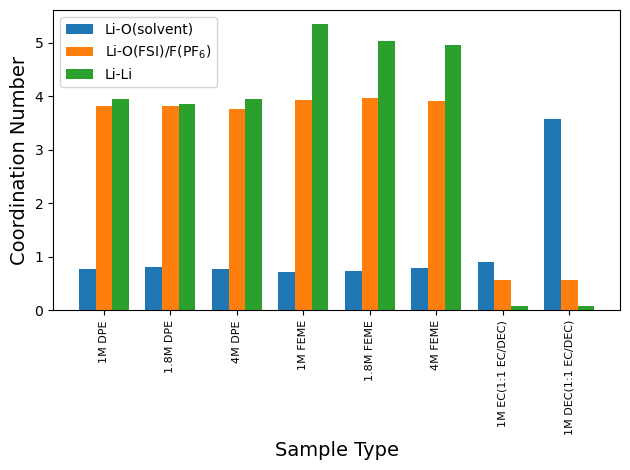

In [10]:
#CN is the first inflection point in the CN plot. First inflection point is the first minima.
# Categories
categories = ['1M DPE', '1.8M DPE', '4M DPE','1M FEME', '1.8M FEME', '4M FEME', '1M EC(1:1 EC/DEC)', '1M DEC(1:1 EC/DEC)']

# Data: [Li-O(solvent), Li-O(FSI)/Li-F(PF6), Li-Li] for each category
values = [
    [0.77, 3.82, 3.95],  # DPE_1M
    [0.80, 3.81, 3.86],  # DPE_1.8M
    [0.77, 3.75, 3.94],  # DPE_4M
    [0.72, 3.92, 5.34],  # FEME_1M
    [0.74, 3.96, 5.03],  # FEME_1.8M
    [0.79, 3.91, 4.96],  # FEME_4M
    [0.90, 0.56, 0.09],  # EC(EC1+DEC1_1M)
    [3.58, 0.56, 0.09]   # DEC(EC1+DEC1_1M)
]

values = np.array(values)  # Convert to NumPy array for easier manipulation

# Bar settings
num_categories = len(categories)
bar_width = 0.25  # Width of the bars
index = np.arange(num_categories)

# Plotting
fig, ax = plt.subplots()
for i in range(3):  # Three bars for each category
    label=["O(solvent)", "O(FSI)/$\\mathrm{F(PF_6)}$", "Li"][i]
    ax.bar(index + i*bar_width, values[:, i], bar_width, label=f'Li-{label}')


# fig, ax = plt.subplots()
# for i in range(3):  # Three bars for each category
#     ax.bar(index + i*bar_width, values[:, i], bar_width, label=f'Li-{["O(solvent)", "O(FSI)", "Li"][i]}')

# Final plot adjustments
ax.set_xlabel('Sample Type')
ax.set_ylabel('Coordination Number')
ax.set_title('Bar plot for different conditions')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(categories)
#make the categories labels smaller
plt.xticks(fontsize=8, rotation=90)
plt.yticks(fontsize=10)

ax.legend()
save_fig('Bar_plot_CN_DPE_FEME_ECDEC')
# Show plot
plt.show()

